<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [ ]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [5]:
# loading the data:
import pandas as pd

customers = pd.read_csv('../data/Wholesale customers data.csv')
customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [24]:
# Your code here:
customers.columns   # se observan las columnas
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

<AxesSubplot:>

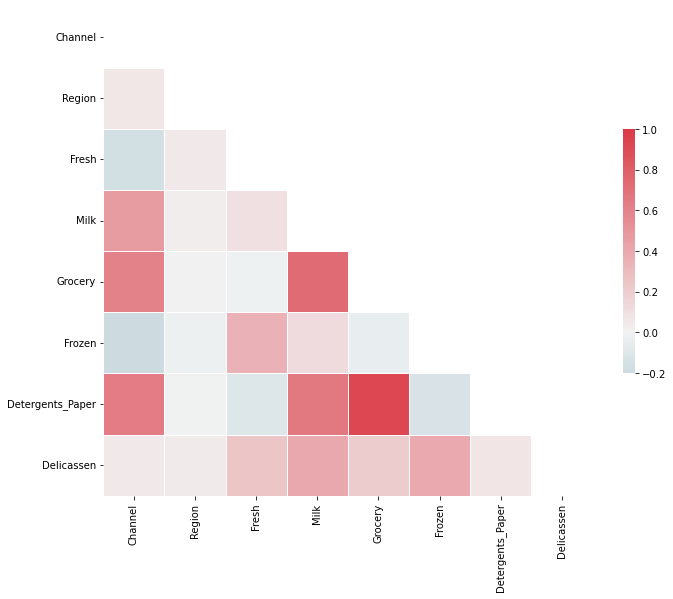

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = customers.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})

In [23]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [42]:
customers= customers.drop(columns=['index_column'])
customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,customer º
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,3
4,2,3,22615,5410,7198,3915,1777,5185,4
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,435
436,1,3,39228,1431,764,4510,93,2346,436
437,2,3,14531,15488,30243,437,14841,1867,437
438,1,3,10290,1981,2232,1038,168,2125,438


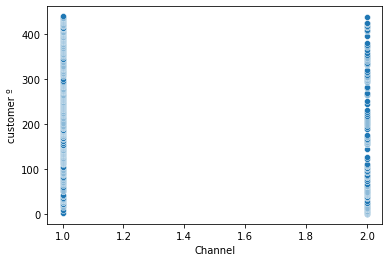

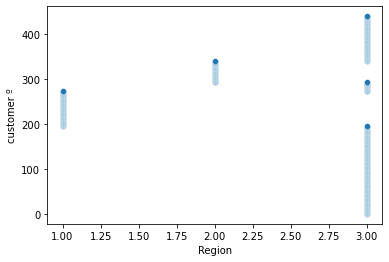

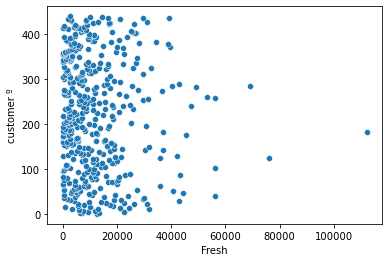

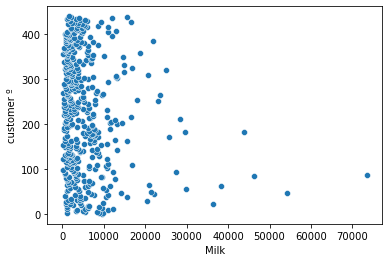

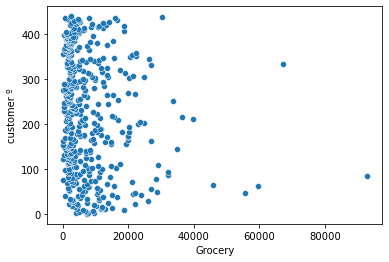

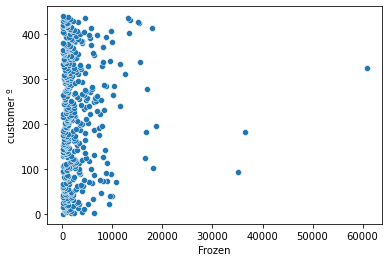

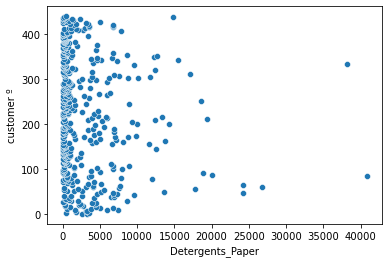

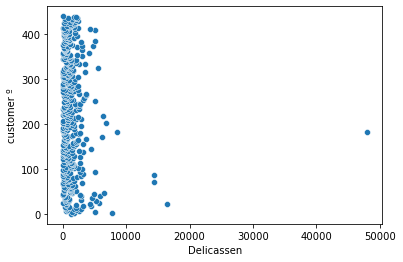

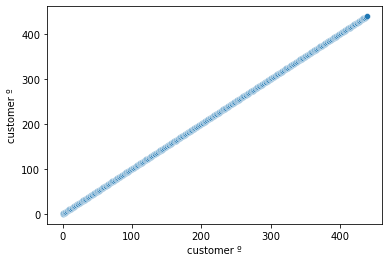

In [46]:
x= customers.columns.values.tolist()
for el in x:
    sns.scatterplot(data=customers, x=el, y='customer º')
    plt.show()

**Your observations here**

+ 
+ 
+ 
+ 



In [ ]:
#You code here
What does each column mean?
how much each client is spending on x product
what region and channel each client is from

In [ ]:
#You code here
Any categorical data to convert?
all columns are numerical 

In [50]:
#You code here
print(customers.isnull().sum())
print('nope')

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
customer º          0
dtype: int64
nope


<AxesSubplot:>

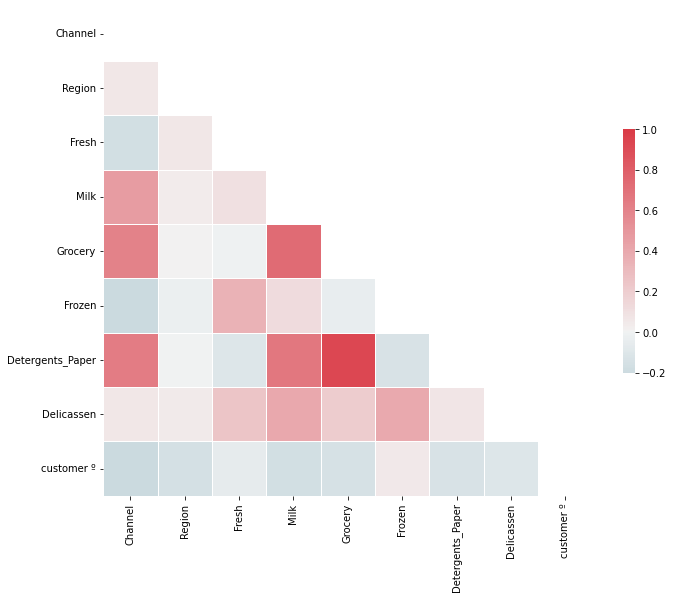

In [51]:
#You code here
'Column collinearity - any high correlations'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = customers.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})


In [ ]:
#You code here

Al final he decidido no limpiar el dataset y dejarlo, de momento, tal cual. Aunque ahora voy a transformar ciertas features de numerico a dummies... 

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here
Solo hay que remover unos outliers:
    deli 1
    detergent 2
    frozen 1
    grocery 2
    milk 2
    fresh 3

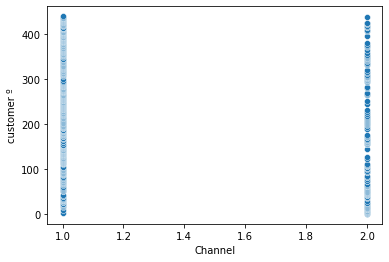

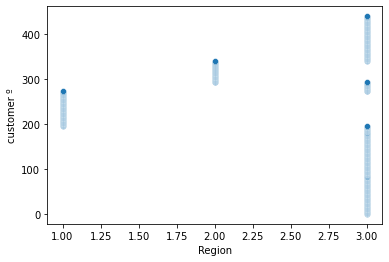

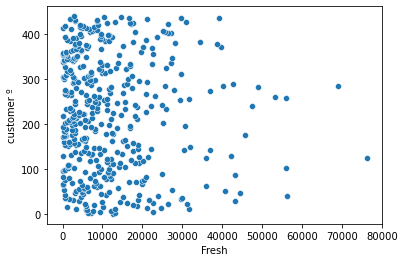

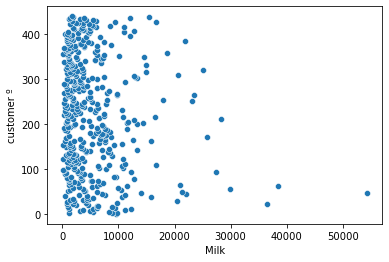

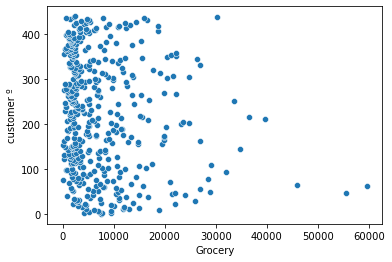

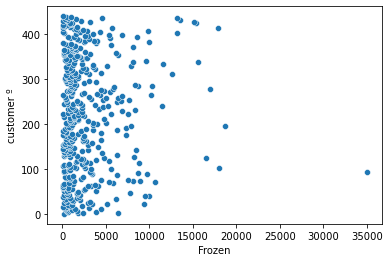

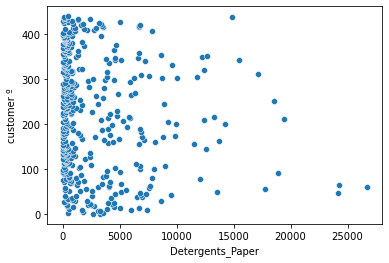

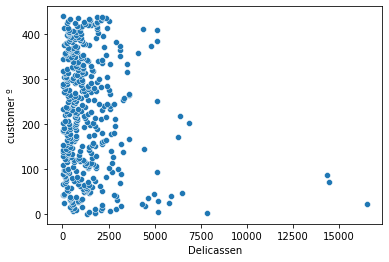

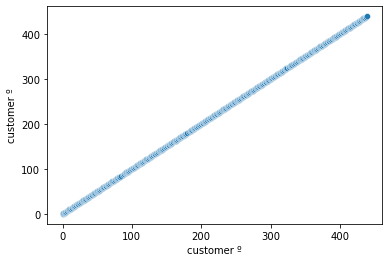

In [61]:
x= ['Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']
for el in x:
    customers=customers.drop(customers[el].idxmax())
x= customers.columns.values.tolist()
for el in x:
    sns.scatterplot(data=customers, x=el, y='customer º')
    plt.show()    


**Your comment here**

+ 
+ 
+ 

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [128]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
scaler.fit(customers)
customers_scale=scaler.transform(customers)

array([[ 1.45681233,  0.59042128,  0.08848812, ..., -1.72617921,
        -1.12762451,  0.29617444],
       [ 1.45681233,  0.59042128, -0.3930863 , ..., -1.7183253 ,
         1.25383066,  0.29617444],
       [ 1.45681233,  0.59042128, -0.45349763, ..., -1.71047138,
         1.25383066,  0.29617444],
       ...,
       [ 1.45681233,  0.59042128,  0.24826923, ...,  1.70598342,
        -0.41318796, -3.3763886 ],
       [-0.68643022,  0.59042128, -0.11565756, ...,  1.71383734,
         1.01568514,  0.29617444],
       [-0.68643022,  0.59042128, -0.75950162, ...,  1.72169126,
        -1.36577003,  0.29617444]])

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [129]:
from sklearn.cluster import KMeans
from sklearn import cluster, datasets

# Your code here:
kmeans=cluster.KMeans(n_clusters=12).fit(customers_scale)
customers['labels'] = kmeans.labels_


Count the values in `labels`.

In [130]:
# Your code here:
customers['labels'].value_counts()

2     60
10    57
3     56
6     55
8     51
0     46
1     41
11    33
5     15
9     12
4      5
7      3
Name: labels, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [148]:
# Your code here
from sklearn.cluster import DBSCAN 
clustering = DBSCAN(eps=0.5).fit(customers_scale)
customers['labels_DBSCAN'] = clustering.labels_
customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,customer º,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,0,8,-1
1,2,3,7057,9810,9568,1762,3293,1776,1,2,-1
2,2,3,6353,8808,7684,2405,3516,7844,2,2,-1
3,1,3,13265,1196,4221,6404,507,1788,3,6,-1
4,2,3,22615,5410,7198,3915,1777,5185,4,2,-1
...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,435,5,-1
436,1,3,39228,1431,764,4510,93,2346,436,10,-1
437,2,3,14531,15488,30243,437,14841,1867,437,9,-1
438,1,3,10290,1981,2232,1038,168,2125,438,10,-1


Count the values in `labels_DBSCAN`.

In [149]:
# Your code here
customers['labels_DBSCAN'].value_counts()

-1    400
 0     13
 1     13
 2      8
Name: labels_DBSCAN, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

C:\Users\penzi\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


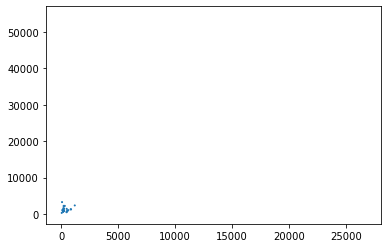

In [143]:
# Your code here:
#plt.scatter(customers.Detergents_Paper, customers.Milk, customers.labels);
plt.scatter(customers.Detergents_Paper, customers.Milk, customers.labels_DBSCAN)


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

C:\Users\penzi\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


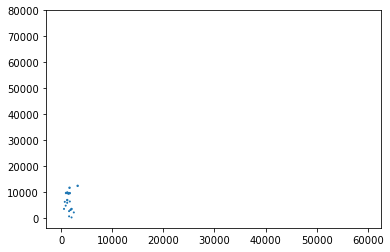

In [150]:
# Your code here:
#plt.scatter(customers.Grocery, customers.Fresh, customers.labels);
plt.scatter(customers.Grocery, customers.Fresh, customers.labels_DBSCAN)

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

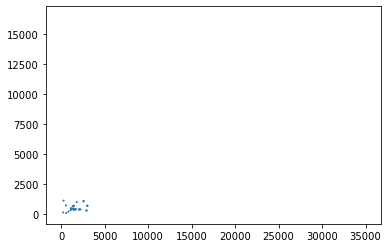

In [151]:
# Your code here:
#plt.scatter(customers.Frozen, customers.Delicassen, customers.labels);
plt.scatter(customers.Frozen, customers.Delicassen, customers.labels_DBSCAN)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [153]:
# Your code here:
print(customers.groupby(by="labels").mean())
customers.groupby(by="labels_DBSCAN").mean()

         Channel    Region         Fresh          Milk       Grocery  \
labels                                                                 
0       1.065217  2.847826   4641.608696   2508.717391   3450.347826   
1       1.024390  3.000000   8896.439024   2892.414634   3518.829268   
2       1.983333  2.683333   6697.533333   6958.250000   9816.366667   
3       1.053571  1.000000  11028.232143   3231.678571   3889.089286   
4       2.000000  2.600000  20362.000000  33877.000000  46545.000000   
5       1.000000  2.333333  35165.266667  10385.000000   7206.000000   
6       1.000000  3.000000  13228.781818   2697.254545   3460.181818   
7       1.333333  3.000000  29309.666667  14238.000000  17059.333333   
8       2.000000  2.607843   7542.764706  10116.607843  17511.882353   
9       2.000000  2.500000   7027.916667  18343.333333  26968.333333   
10      1.035088  2.736842  16573.000000   2553.333333   3956.929825   
11      1.060606  2.757576  18019.090909   3182.787879   3639.18

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,customer º,labels
labels_DBSCAN,,,,,,,,,,
-1,1.3475,2.5025,11979.665000,5718.370000,7980.490000,2958.532500,2874.742500,1467.467500,215.127500,5.165
0,1.0000,3.0000,10365.384615,1604.307692,2282.000000,1636.307692,443.153846,479.846154,116.615385,6.000
1,1.0000,3.0000,3488.615385,1368.923077,1547.923077,1094.769231,296.000000,496.461538,361.461538,0.000
2,1.0000,3.0000,9855.125000,1165.125000,1555.125000,2055.125000,361.625000,512.500000,390.125000,10.000


Which algorithm appears to perform better?

**Your observations here**

 Me cuesta un poco ver cual de los dos modelos clusteriza mejor a traves de sus medias. Si fuera por los graficos diria que kmeans funciona mejor, aunque si fuera por la diferencia de medias podria ser DBSCAN. Para mi ninguno de los dos esta haciendo buenos clusters. 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

**Your comment here**

Segun puedo ver, 2 clusters parecen funcionar mejor.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

+ 
+ 
+ 
